Julian Francisco Pinchao Ortiz

Los siguientes datos fueron extraidos de los datos para la cuarta ola de infecciones por millon de  habitantes (IPMH) de Colombia por la variante Omicrón del Coronavirus

A) Genere un data frame de pandas y agregé una nueva columna de IPMH con una incertidubre del 2% aleatoria. Es decir, a cada IPMH sumarle o restarle un número aleatoria en el rango de su 2%

B) Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine (para la columna con incertidumbre)
1. La velocidad inicial de IPMH  en `IPMH/día`
1. La aceleración constante en `IPMH/día**2`
1. El número máximo de IPMH que se alcanzaría
1. El número de días en el que se alcanzaría dicho máximo
1. Realice una gráfico que muestré el ajuste y la posición del máximo usando los estándares adecuados

DATOS
```python  
[
    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}
]
```

In [1]:
import pandas as pd
#A
datos=[
    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}
]

df=pd.DataFrame(datos)

In [2]:
print(df)

   día  IPMH
0    1   464
1    2   494
2    3   532
3    4   552
4    5   576
5    6   589


In [9]:
df["IPMH2"]=df["IPMH"]-df["IPMH"]*2/1000
df

,día,IPMH,IPMH2
0,1,464,463.072
1,2,494,493.012
2,3,532,530.936
3,4,552,550.896
4,5,576,574.848
5,6,589,587.822


In [42]:
import numpy as np

'''
B
Polinomio por caida libre del data frame de los dias y el IPMH con incertidumbre del 2 por mil
'''
coeficientes=np.polyfit(df.día,df.IPMH2,deg=2)
polinomio=np.poly1d(coeficientes,variable='d')
print(polinomio)

        2
-2.513 d + 43 d + 421.1


In [43]:
'''
1
La velocidad inicial la encontramos con la derivada y calculamos en 0
'''
v=polinomio.deriv()
print(f'La velocidad inicial del virus es {round(v(0),2)} IPMH/dia')

La velocidad inicial del virus es 43.0 IPMH/dia


In [44]:
'''
2
La aceleración la encontramos con la derivada de la velocidad y calculamos en 0
'''
a=v.deriv()
print(f'La acelaración inicial del virus es {round(a(0),2)} IPMH/dia^2')

La acelaración inicial del virus es -5.03 IPMH/dia^2


In [74]:
'''
Para hallar el pico maximo, se debe buscar el tiempo cuando la velocidad es 0, se lo hace buscando la raiz en la derivada
de la velocidad
'''
v_0=v.roots
pmax=polinomio(v_0)
print(f'La población maxima del virus es {round(pmax[0],2)} IPMH')
print(f'La población maxima del virus llega a los {round(v_0[0],2)} días')

La población maxima del virus es 604.98 IPMH
La población maxima del virus llega a los 8.56 días


In [50]:
polinomio.roots

array([24.07165268, -6.96101438])

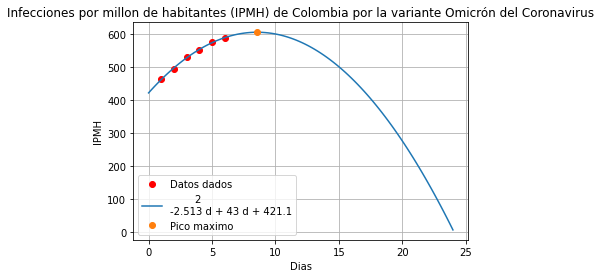

In [72]:
import matplotlib.pyplot as plt
x=np.linspace(0,24,100)
plt.plot(df.día,df.IPMH2,'ro',label='Datos dados')
plt.plot(x,polinomio(x),label=polinomio)
plt.plot(v_0[0],pmax[0],'o',label='Pico maximo')
plt.legend()
plt.xlabel('Dias')
plt.ylabel('IPMH')
plt.title('Infecciones por millon de habitantes (IPMH) de Colombia por la variante Omicrón del Coronavirus')
plt.grid()